In [1]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('..')

from layer import Dense
from activation import ReLU, Linear
from loss import RootMeanSquareError
from model import Sequential
from optimizer import SGD

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.california_housing.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [4]:
feature_transformer = StandardScaler().fit(X_train)
label_transformer = StandardScaler().fit(y_train.reshape(-1, 1))
X_train = feature_transformer.transform(X_train)
X_test = feature_transformer.transform(X_test)
y_train = label_transformer.transform(y_train.reshape(-1, 1))
y_test = label_transformer.transform(y_test.reshape(-1, 1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

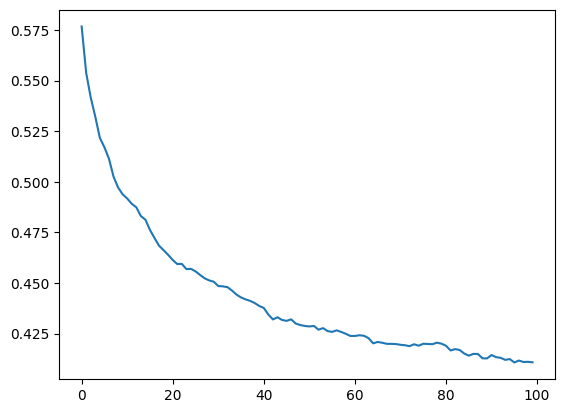

In [5]:
model = Sequential()
model.add(Dense(X_train.shape[1], 64, ReLU()))
model.add(Dense(64, 32, ReLU()))
model.add(Dense(32, 1, Linear()))

optimizer = SGD(learning_rate=0.01)
loss_func = RootMeanSquareError()

loss_history = []

batch_size = 32
for epoch in range(100):
    for i in range(0, len(X_train), batch_size):
        batch_features = X_train[i:i + batch_size]
        batch_labels = y_train[i:i + batch_size]

        batch_preds = model(batch_features)

        loss = loss_func.loss(batch_preds, batch_labels)
        grads = loss_func.derivative(batch_preds, batch_labels)

        model.backward(grads)

        optimizer.step(model)

    loss_history.append(loss)
    # print(f'Epoch {epoch + 1}, loss: {loss}')

plt.plot(loss_history)

In [6]:
y_pred = label_transformer.inverse_transform(model(X_test))
y_test = label_transformer.inverse_transform(y_test)
root_mean_squared_error(y_pred, y_test)

53652.30184016874